# Car Evaluation (SVM: Non-Linear)

Support vector machine algorithm works with a hyperplane and hyperplane only works when dataset has two separate clusters.
But this is not always the case, sometimes data is mixed with each other and that state of data is called non-liniar data and
to deal with it there is something called kernels.

Now, we are solving a similar problem which has a non-linear data.

let's check it out.

## Overview
1. Importing useful libraries and loading data in
2. Preliminary EDA: Exploratory data analysis
3. Converting data into numerical format
4. Split, train and predict/infer on our test set
5. Evaluate the model's performance
6. Conclusion

# 1. Importing useful libraries and loading data in

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from pylab import rcParams

In [41]:
df = pd.read_csv('C:/Users/hpp\Documents/Python/machine learning/Support-Vector-Machines/practice/car_evaluation.csv')
df.head()

,price,buying,maintenance,doors,persons,luggage_boot,safety
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# 2. Preliminary EDA: Exploratory data analysis

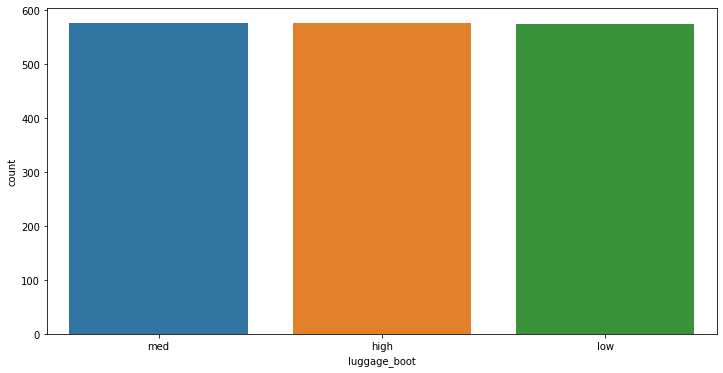

In [45]:
sns.countplot('luggage_boot',data=df)
rcParams['figure.figsize']=12,6

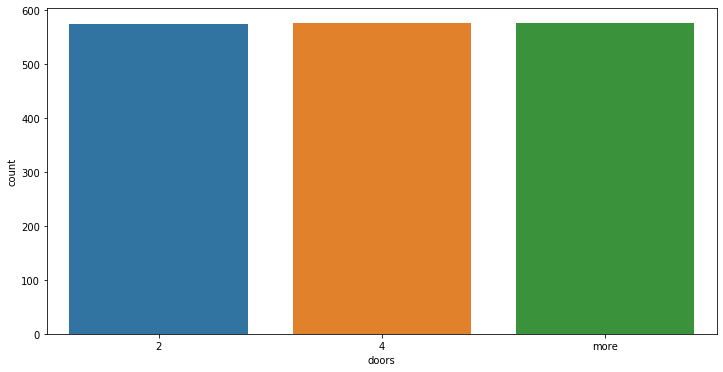

In [46]:
sns.countplot('doors',data=df)

# 3. Converting data into numerical format

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
enc = LabelEncoder()

In [49]:
df.price = enc.fit_transform(df.price)
df.price.head()

0    3
1    3
2    3
3    3
4    3
Name: price, dtype: int32

In [50]:
df.buying = enc.fit_transform(df.buying)
df.buying.head()

0    3
1    3
2    3
3    3
4    3
Name: buying, dtype: int32

In [51]:
df.maintenance = enc.fit_transform(df.maintenance)
df.maintenance.head()

0    0
1    0
2    0
3    0
4    0
Name: maintenance, dtype: int32

In [52]:
df.doors = enc.fit_transform(df.doors)
df.doors.head()

0    0
1    0
2    0
3    0
4    0
Name: doors, dtype: int32

In [53]:
df.persons = enc.fit_transform(df.persons)
df.persons.head()

0    2
1    2
2    1
3    1
4    1
Name: persons, dtype: int32

In [54]:
df.luggage_boot = enc.fit_transform(df.luggage_boot)
df.luggage_boot.head()

0    2
1    0
2    1
3    2
4    0
Name: luggage_boot, dtype: int32

In [55]:
df.head()

,price,buying,maintenance,doors,persons,luggage_boot,safety
0,3,3,0,0,2,2,unacc
1,3,3,0,0,2,0,unacc
2,3,3,0,0,1,1,unacc
3,3,3,0,0,1,2,unacc
4,3,3,0,0,1,0,unacc


In [56]:
df=df.replace('more',value=6)

In [57]:
df.head()

,price,buying,maintenance,doors,persons,luggage_boot,safety
0,3,3,0,0,2,2,unacc
1,3,3,0,0,2,0,unacc
2,3,3,0,0,1,1,unacc
3,3,3,0,0,1,2,unacc
4,3,3,0,0,1,0,unacc


In [58]:
df.dtypes

price            int64
buying           int64
maintenance      int64
doors            int64
persons          int64
luggage_boot     int64
safety          object
dtype: object

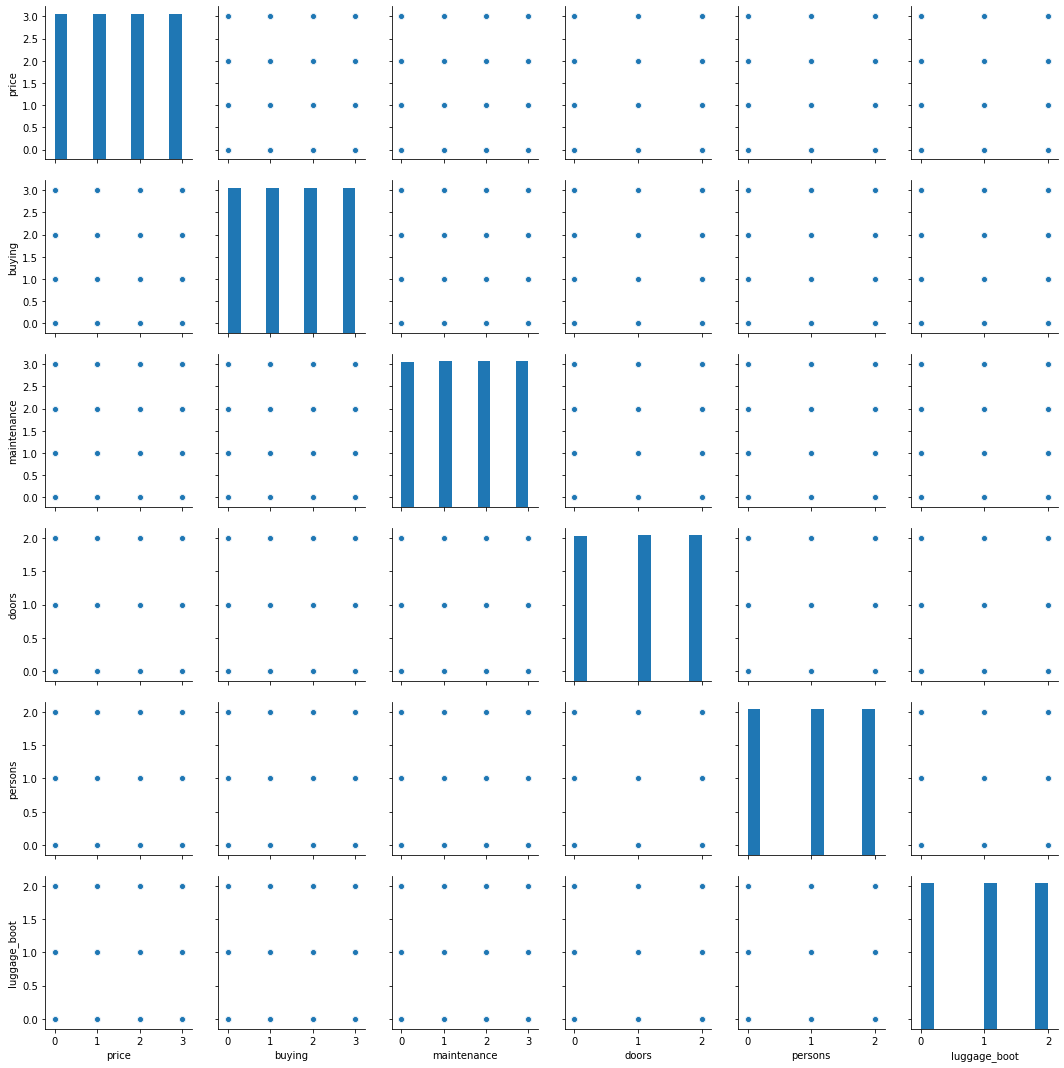

In [59]:
sns.pairplot(df)

# 4. Split, train and predict/infer on our test set

In [18]:
X = df.drop('safety',axis=1)
y = df['safety']

In [19]:
# Splitting the data into training and testing sets 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [20]:
from sklearn.svm import SVC
model = SVC(C=2,gamma=1,kernel='rbf')

In [21]:
model.fit(X_train,y_train) # Training the model

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# 5. Evaluate the model's performance

In [22]:
predictions = model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy_score(y_test,predictions)

0.9672447013487476

In [24]:
print(Counter(y_test))

Counter({'unacc': 358, 'acc': 123, 'vgood': 22, 'good': 16})


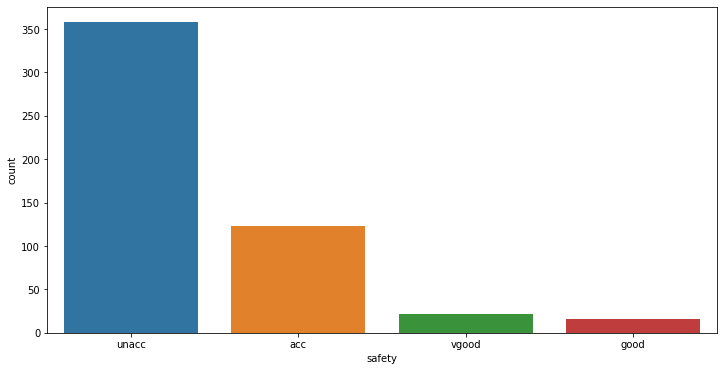

In [60]:
sns.countplot(y_test)

In [26]:
pd.crosstab(y_test,predictions)

col_0,acc,good,unacc,vgood
safety,,,,
acc,115,0,8,0
good,1,15,0,0
unacc,2,0,356,0
vgood,5,1,0,16


# 6. Conclusion

In [27]:
newdata = ([3,3,0,0,2,2],[3,3,0,0,2,2])
model.predict(newdata)

array(['unacc', 'unacc'], dtype=object)

So, we can predict safety now based on this data and use it to find cars with higher safety just by input of these variables.

thank you!